In [3]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Data Representations

In [4]:
import numpy as np
x = np.array(12)

In [5]:
x

array(12)

In [6]:
x.ndim

0

In [7]:
x = np.array([12, 3, 6, 14, 7])

In [8]:
x

array([12,  3,  6, 14,  7])

In [9]:
x.ndim

1

In [10]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 67, 3, 35, 1],
              [7, 80, 4, 36, 2]])

In [11]:
x

array([[ 5, 78,  2, 34,  0],
       [ 6, 67,  3, 35,  1],
       [ 7, 80,  4, 36,  2]])

In [12]:
x.ndim

2

In [13]:
x=np.array([[[5,78,2,34,0],
             [6,79,3,35,1],
             [7,80,4,36,2]],
             [[5,78,2,34,0],
              [6,79,3,35,1],
              [7,80,4,36,2]],
             [[5,78,2,34,0],
              [6,79,3,35,1],
              [7,80,4,36,2]]])

In [14]:
x

array([[[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]],

       [[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]],

       [[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]]])

In [15]:
x.ndim

3

In [16]:
x = np.array(12)

In [17]:
x.shape

()

In [18]:
x = np.array([12, 3, 6, 14, 7])

In [19]:
x.shape

(5,)

In [20]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])

In [21]:
x.shape

(3, 5)

In [22]:
x=np.array([[[5,78,2,34,0],
             [6,79,3,35,1],
             [7,80,4,36,2]],
             [[5,78,2,34,0],
             [6,79,3,35,1],
             [7,80,4,36,2]],
             [[5,78,2,34,0],
             [6,79,3,35,1],
             [7,80,4,36,2]]])

In [23]:
x.shape

(3, 3, 5)

In [31]:
x = np.array(12)

In [32]:
x.dtype

dtype('int64')

In [33]:
x = np.array([12, 3, 6, 14, 7])

In [34]:
x.dtype

dtype('int64')

In [35]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])

In [36]:
x.dtype

dtype('int64')

In [37]:
x=np.array([[[5,78,2,34,0],
             [6,79,3,35,1],
             [7,80,4,36,2]],
             [[5,78,2,34,0],
             [6,79,3,35,1],
             [7,80,4,36,2]],
             [[5,78,2,34,0],
             [6,79,3,35,1],
             [7,80,4,36,2]]])

In [38]:
x.dtype

dtype('int64')

## Fashion MNIST Dataset

In [39]:
import tensorflow as tf
from tensorflow import keras

In [40]:
tf.__version__

'2.4.1'

In [41]:
keras.__version__

'2.4.0'

In [43]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [44]:
X_train_full.shape

(60000, 28, 28)

In [45]:
X_train_full.dtype

dtype('uint8')

In [46]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

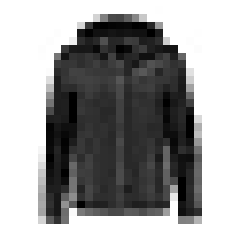

In [47]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [48]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [49]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [50]:
class_names[y_train[0]]

'Coat'

In [51]:
X_valid.shape

(5000, 28, 28)

In [52]:
X_test.shape

(10000, 28, 28)

Saving figure fashion_mnist_plot


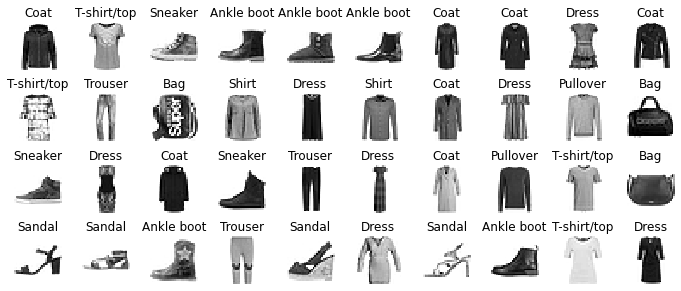

In [53]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

In [54]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [55]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [57]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [58]:
model.layers

In [59]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [61]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [62]:
hidden1 = model.layers[1]
hidden1.name

'dense_3'

In [63]:
model.get_layer(hidden1.name) is hidden1

True

In [65]:
weights, biases = hidden1.get_weights()

In [66]:
weights

array([[ 0.03574536, -0.02389931,  0.01030421, ..., -0.06151724,
        -0.0451347 ,  0.03140047],
       [-0.05467119,  0.04656268, -0.07248728, ..., -0.07038655,
        -0.03083268, -0.06513114],
       [-0.03234808, -0.00317231,  0.04102226, ..., -0.03237895,
         0.01965773, -0.00825518],
       ...,
       [-0.0630435 ,  0.07371157, -0.05752673, ...,  0.07049479,
         0.05577183, -0.02518321],
       [-0.02547856,  0.07304457,  0.04983643, ..., -0.05780029,
         0.07438232, -0.0286764 ],
       [-0.02862201,  0.01245171, -0.04573321, ...,  0.04891213,
        -0.06256616, -0.02975626]], dtype=float32)

In [67]:
weights.shape

(784, 300)

In [68]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [69]:
biases.shape

(300,)

In [70]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [71]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.9651 - accuracy: 0.6969 - val_loss: 0.5178 - val_accuracy: 0.8198
Epoch 2/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.5044 - accuracy: 0.8235 - val_loss: 0.4351 - val_accuracy: 0.8496
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4513 - accuracy: 0.8410 - val_loss: 0.5431 - val_accuracy: 0.7954
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4235 - accuracy: 0.8525 - val_loss: 0.3956 - val_accuracy: 0.8638
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4103 - accuracy: 0.8580 - val_loss: 0.3798 - val_accuracy: 0.8676
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3809 - accuracy: 0.8655 - val_loss: 0.3732 - val_accuracy: 0.8706
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3681 - accuracy: 0.8717 - val_loss: 0.3629 - val_accuracy:

In [72]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [73]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [74]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Saving figure keras_learning_curves_plot


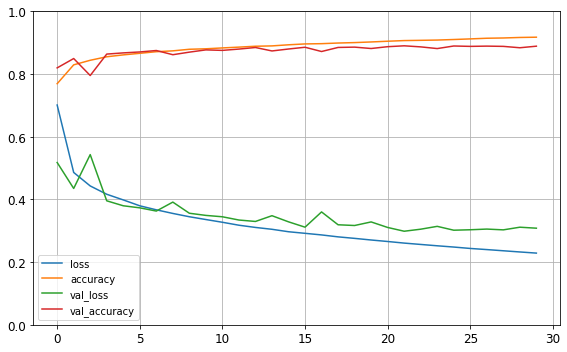

In [76]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig("keras_learning_curves_plot")
plt.show()


In [77]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3407 - accuracy: 0.8786


[0.34073084592819214, 0.878600001335144]

In [78]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.02, 0.  , 0.97],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [79]:
#y_pred = model.predict_classes(X_new) # deprecated
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([9, 2, 1])

In [80]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [81]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

Saving figure fashion_mnist_images_plot


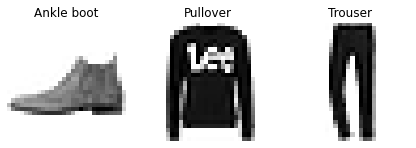

In [82]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_images_plot', tight_layout=False)
plt.show()

## Regression MLP

In [83]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [84]:
np.random.seed(42)
tf.random.set_seed(42)

In [85]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.2656 - val_loss: 0.8560
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7413 - val_loss: 0.6531
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6604 - val_loss: 0.6099
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6245 - val_loss: 0.5658
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5770 - val_loss: 0.5355
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5609 - val_loss: 0.5173
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5500 - val_loss: 0.5081
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5200 - val_loss: 0.4799
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5051 - val_loss: 0.4690
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4910 - val_loss: 0.4656

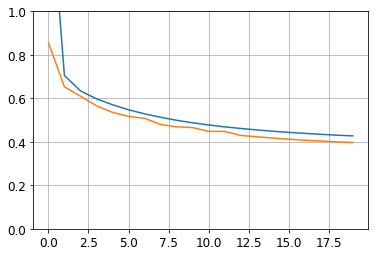

In [86]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [87]:
y_pred

array([[0.3885664],
       [1.6792021],
       [3.1022797]], dtype=float32)